# DSSC UCL HACK - OREOS

AstraZeneca stock prices increased from £3848 to £4467 on July 2016 – yes post Brexit, pharmaceutical prices seemed to be unaffected! Compared to this month’s tweet posted by Trump, Pfizer’s stocks dropped from $34.35 to $33.94 




## Introduction

Our team was interested in the effect of major recent political changes in the UK and the US, namely the Brexit in June 2016 and Trump’s victory in November 2016, on the financial market. We wanted to identify the impact of these events on the Pharmaceutical industry and if there were any identifiable relationships based on historical prices. We wanted to quantify the strength and magnitude of those relationships: how Trump’s tweet of crashing Pharmaceutical stocks really do affect price variation or how Big Pharma trots along a falling British pound currency, untouched.




## Data Scaling

We therefore began by parsing the datasets given to us to extract the information related to the UK at first. We focused on the five leading Pharmaceutical companies, AstraZeneca PLC, Shire PLC, Smith & Nephew PLC and Hikma Pharmaceuticals PLC. We focused on the Close value for each as it is the most reliable and most representative for the company on the day with the least variation. 



In [49]:
# loading the equity datasets
equity=read.csv("Equity.csv")
equity_master=read.csv("Equity_Master.csv")

equity$Date=as.Date(equity$Date)
print(as.vector(unique(equity_master$Sector)))

 [1] "Technology"             "Communications"         "Financials"            
 [4] "Energy"                 "Health Care"            "Industrials"           
 [7] "Consumer Discretionary" "Consumer Staples"       "#N/A N/A"              
[10] "Materials"              "Utilities"             


In [1]:
# focusing on Health Care Sector
health=equity_master[equity_master$Sector==c("Health Care"),]

length(unique(health$Ticker))
# filtering the Brithish companies
british = health[health$Currency=="GBp",]
brit_tick=as.vector(unique(british$Ticker))
dict=data.frame(ticker=british$Ticker,company=british$Description)

equity_brit = data.frame()
for (i in 1:length(brit_tick)) {
    temp=equity[equity$Ticker==brit_tick[i],]
   # temp$Ticker[temp$Ticker==brit_tick[i]]<-dict[dict$ticker==brit_tick[i],]$company
    equity_brit=rbind(equity_brit,temp)
}
head(equity_brit)
equity_brit$Date=as.Date(equity_brit$Date)



ERROR: Error in eval(expr, envir, enclos): object 'equity_master' not found


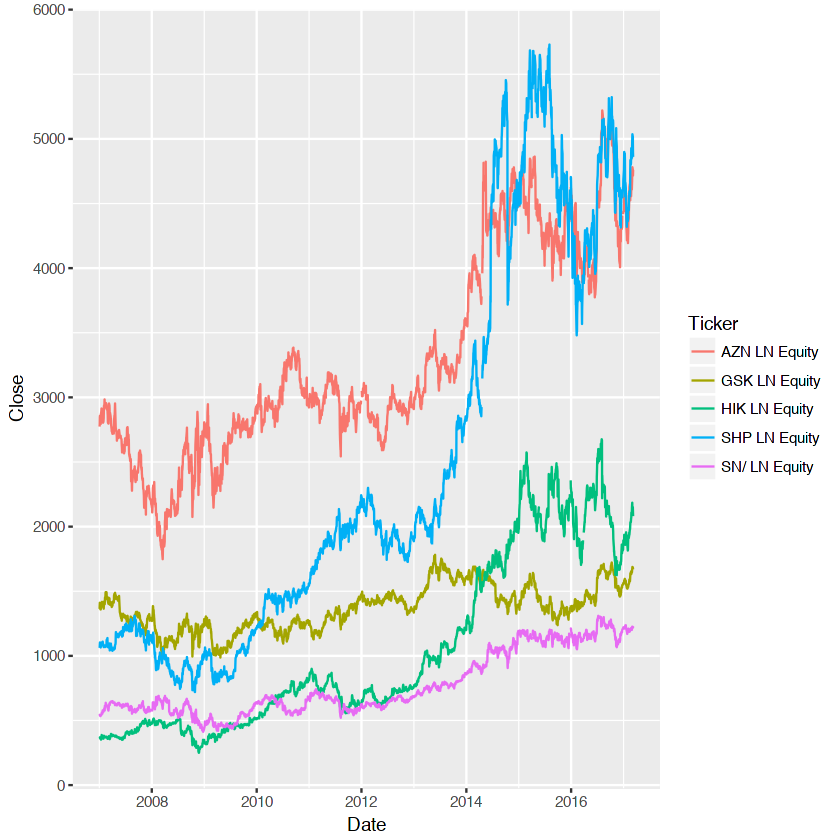

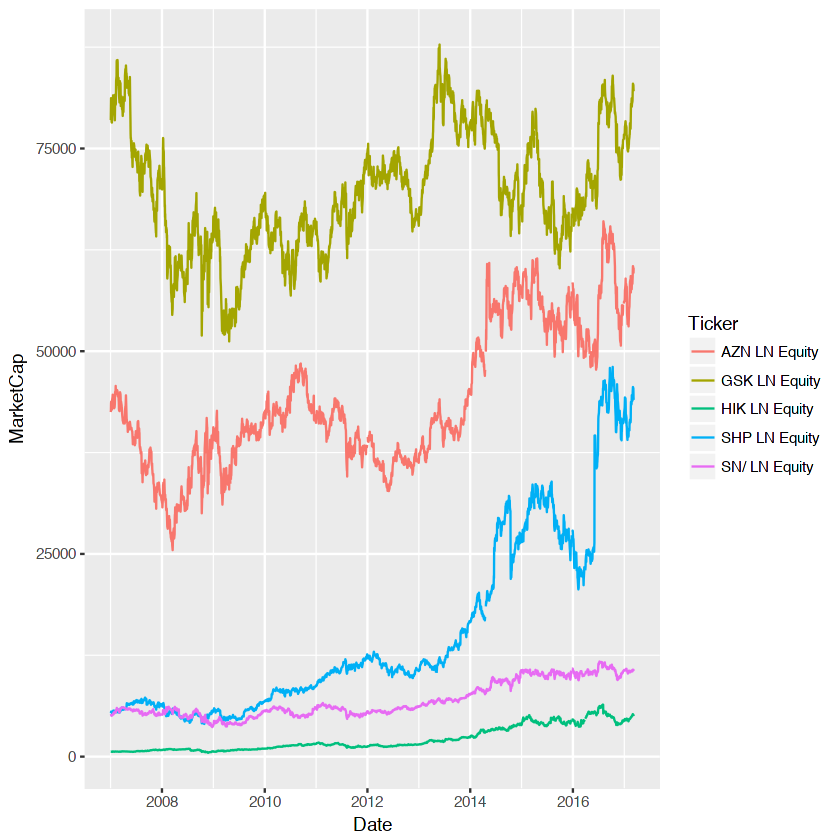

In [61]:
# preliminary plotting
library(ggplot2)
eins=ggplot(equity_brit,aes(Date,Close))+geom_line(aes(color=Ticker,group=Ticker))
plot(eins)
ggplot(equity_brit,aes(Date,MarketCap))+geom_line(aes(color=Ticker,group=Ticker))

## Model Selection

The next step was to create a model on Azure ML to explore any underlying patterns within our data. As our data were time series we selected a linear regression model, a popular financial approach, to reveal any trends. We then added data for each company the difference of quarterly GDP values to see whether this feature would affect our model. This feature had minimal effect to the second decimal place which led us to explore other features to include. We very soon realised that interesting data such as pharmaceutical sales, new marketed medicines, diagnosis rate of certain diseases and demographic datasets (ageing etc) were difficult to find due to the nature of the industry and its regulations. We overcame this obstacle by making use of the data we had by training the model with previous data points to forecast the next.
The addition of the following models was also implemented to compare their predictive power: Linear Regression, Bayesian Linear Regression and Neural Network Regression on all five datasets of the pharmaceutical companies. We found that the simple and Bayesian linear regression had similar relative and absolute error values in all five companies. In contrast, the neural network did not produce stable results across the five datasets. GSK PLC had a low 22.5% relative absolute error whereas Hika PLC generated a high error of 167.6%. This variability suggests that the neural net model needs further analysis and that the recommended model for these types of datasets would be the linear or Bayesian regressions.  
Furthermore, hyperparameters in the neural nets must be extensively explored with metaheuristic optimisation methods as due to the time restrictions, we manually explored these parameters through trial and error.

## Future Work - Outliers


In [2]:
library(forecast)
# using tsoutliers and amir
#  tsoutliers(x, iterate = 2, lambda = NULL)


To improve the prediction accuracy of our model, looking at the outliers is necessary. After identifying the outliers we can generate 'fake' data to imply a correlating event and possibly discover a time frame between events (political, social, etc) and a pharma stock market reaction.